
# <span style="color: #663399; font-size: 22px;"> "Verificação de padrões de inadimplência entre clientes de uma instituição financeira"</span>

<img src="https://finanzero.com.br/wp-content/uploads/2021/05/analise-de-credito-1280x825-1.jpg" alt="logo">

# <span style="color: #9370DB;">1.0 Introdução ao caso</span>


- <span style="color: black; opacity: 0.7; font-size: 18px;">   
Este estudo tem como objetivo verificar possíveis tendências de clientes que são inadimplentes, tendo como base o comportamento de outros atributos (ex.: salário, escolaridade, movimentação financeira, etc);
</span>
- <span style="color: black; opacity: 0.7; font-size: 18px;">
A variável dependente é o "default", onde (default == 0) significa que o cliente é adimplente, e (default == 1) significa que o cliente é inadimplente.
</span>   



# <span style="color: #9370DB;">2.0 Descritivo sobre cada atributo</span>


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

# <span style="color: #9370DB;">3.0 Imports</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# <span style="color: #9370DB;">4.0 Carregamento dos dados</span>

Referência: https://www.kaggle.com/datasets/gabrielfigaterribile/cliente-banco/data

In [2]:
%%time
df = pd.read_csv('../input/cliente-banco/clientes_banco.csv', na_values='na') 

quant_linhas, quant_colunas = df.shape
print(f'Quantidade de linhas: {quant_linhas}')
print(f'Quantidade de colunas: {quant_colunas}\n')

Quantidade de linhas: 10127
Quantidade de colunas: 16

CPU times: user 13.8 ms, sys: 8.92 ms, total: 22.7 ms
Wall time: 44.9 ms


In [3]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


# <span style="color: #9370DB;">5.0 Distribuição dos dados</span>

In [4]:
quantidade_adimplentes, _ = df[df['default'] == 0].shape
print(f'Quantidade de clientes adimplentes: {quantidade_adimplentes}\n')

quantidade_inadimplentes, _ = df[df['default'] == 1].shape
print(f'Quantidade de clientes inadimplentes: {quantidade_inadimplentes}')

Quantidade de clientes adimplentes: 8500

Quantidade de clientes inadimplentes: 1627


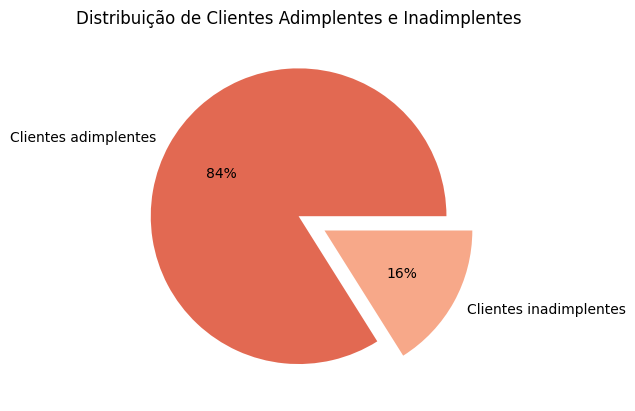

In [5]:
data = [quantidade_adimplentes, quantidade_inadimplentes] 
keys = ['Clientes adimplentes', 'Clientes inadimplentes'] 

explode = [0, 0.2] 
  
palette_color = sns.color_palette('coolwarm_r') 
  
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%') 

plt.title('Distribuição de Clientes Adimplentes e Inadimplentes')
  
plt.show() 

# <span style="color: #9370DB;">6.0 Análise exploratória de dados (AED)</span>

## 6.1 Colunas e seus respectivos tipos de dados

In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### Colunas com atributos categóricos

In [7]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Obs.: Pode-se observar que as colunas 'limite_credito' e 'valor_transacoes_12m' estão sendo interpretados como atributos categóricos, contudo, para que possamos realizar a análise de dados utilizando estas colunas, iremos alterá-las como atributos numéricos (na fase de transformação de dados).

### Colunas com atributos númericos

In [8]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Obs.: Há a opção de alterarmos a coluna 'id' para um atributo categórico, porém como não utilizaremos tal parâmetro em nossa análise, não iremos alterar esta coluna na fase de transformação dos dados.

## 6.2 Exploração dos dados nulos 

### Verificação de quais colunas possuem dados nulos

In [9]:
df.isna().any() # As colunas 'escolaridade, 'estado_civil' e 'salario_anual' possuem dados faltantes, pois constam como 'True'

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

### Função que verifica qual o porcentual de dados nulos de cada coluna

In [10]:
def stats_dados_faltantes(df: pd.DataFrame) -> None: 

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [11]:
# Dados faltantes para cada coluna, considerando o dataframe completo
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [12]:
# Considerando somente o dataframe com os clientes adimplentes, abaixo consta a quantidade e porcentual de cada linha com dados nulos
stats_dados_faltantes(df=df[df['default'] == 0]) 

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [13]:
# Considerando somente o dataframe com os clientes inadimplentes, abaixo consta a quantidade e porcentual de cada linha com dados nulos
stats_dados_faltantes(df=df[df['default'] == 1]) 

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# <span style="color: #9370DB;">7.0 Transformação e limpeza dos dados </span>

## Realização do data wrangling, com o objetivo de:
- Corrigir o schema das colunas ('limite_credito' e 'valor_transacoes_12m');
- Remoção dos dados nulos.

## 7.1 Correção de schema

As colunas 'limite_credito' e 'valor_transacoes_12m' estão sendo interpretadas como atributos categóricos, contudo para que possamos trabalhar com os dados destas colunas em nossa análise, iremos transformá-los como atributos numéricos.

In [14]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [15]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [16]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))        
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [17]:
# Schema após transformação dos dados
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

- Atributos categóricos

In [18]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


- Atributos numéricos

In [19]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## 7.1 Remoção dos dados nulos

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(7081, 16)

In [22]:
df[df['default'] == 0].shape

(5968, 16)

In [23]:
df[df['default'] == 1].shape

(1113, 16)

In [24]:
quantidade_total_novo, _ = df.shape
quantidade_adimplentes_novo, _ = df[df['default'] == 0].shape
quantidade_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [25]:
print(f"A proporcão adimplentes ativos é de {round(100 * quantidade_adimplentes / quant_linhas, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * quantidade_adimplentes_novo / quantidade_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * quantidade_inadimplentes / quant_linhas, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * quantidade_inadimplentes_novo / quantidade_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


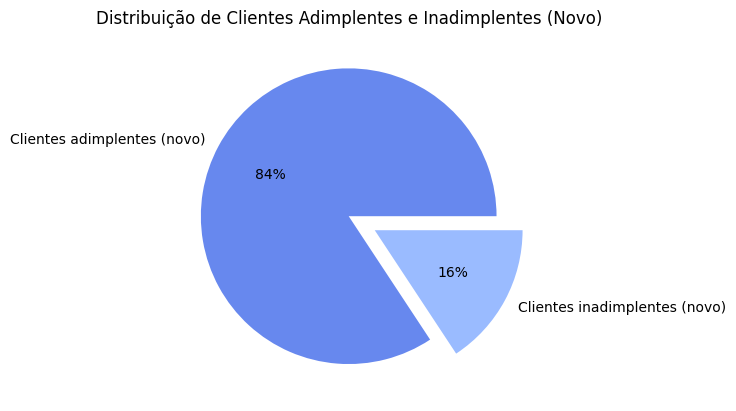

In [26]:
data = [quantidade_adimplentes_novo, quantidade_inadimplentes_novo] 
keys = ['Clientes adimplentes (novo)', 'Clientes inadimplentes (novo)'] 

explode = [0, 0.2] 
  
palette_color = sns.color_palette('coolwarm') 
  
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%') 

plt.title('Distribuição de Clientes Adimplentes e Inadimplentes (Novo)')
  
plt.show() 

# <span style="color: #9370DB;">8.0 Etapa de análise</span>

In [27]:
sns.set_style("darkgrid")

df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

## 8.1 Visualizações dos atributos categóricos

In [28]:
df.drop('sexo', axis=1).select_dtypes('object').describe().transpose() 

,count,unique,top,freq
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


Não foi encontrada nenhuma relação entre os atributos categóricos com à variável resposta **default**.


## 8.2 Visualizações dos atributos numéricos

In [29]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Foi verificada a relação das colunas 'qtd_transacoes_12m' e 'valor_transacoes_12m' com à variável **default**:

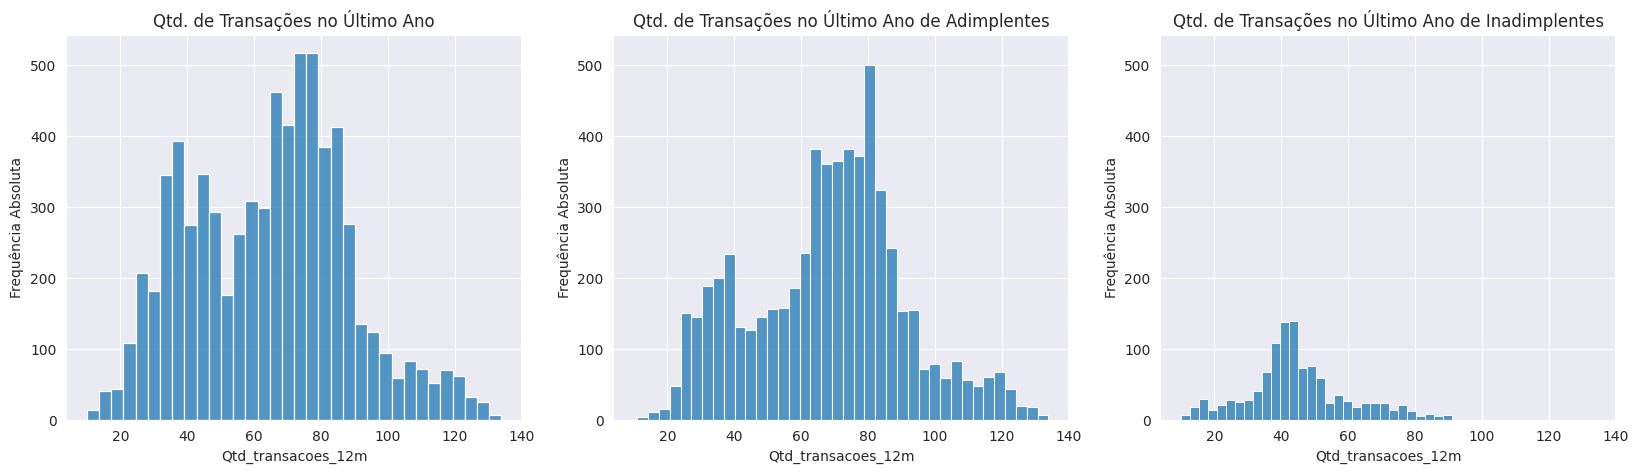

In [30]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

- **Pode-se verificar uma tendência ao default entre os clientes com quantidade de transações entre 20 e 60.**

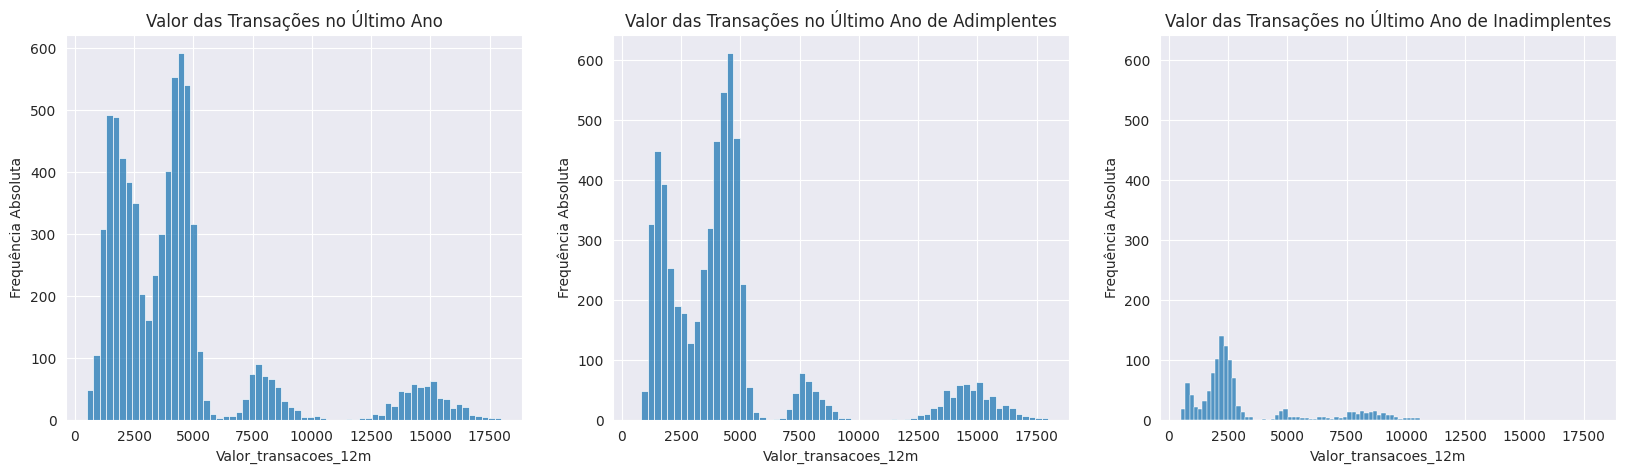

In [31]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

- **Pode-se verificar uma tendência ao default entre os clientes com valor de transções no último ano de 1.000 a 3.000 reais**

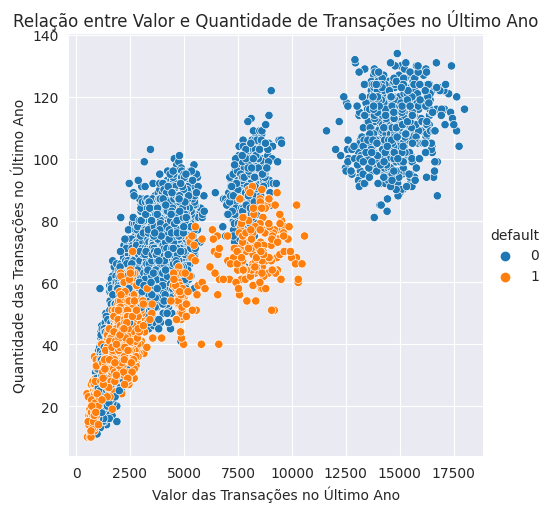

In [32]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

# <span style="color: #9370DB;">9.0 Conclusão</span>

- Foi encontrado uma relação entre as colunas 'qtd_transacoes_12m' e 'valor_transacoes_12m' e a variável default
- Através do gráfico de relação entre o valor e quantidade de transações no último ano, foi possível verificar:


    - Tendências de clientes adimplentes (default = 0):
        - Mais de 80 transações, e valor total das transações entre mil e 5.000 reais;
        - Entre 90 ou mais transações, e valor total da transações maior que 7.500 reais;    
        - Mais de 80 transações, e valor total da transações maior que 12.500 reais;    
        
    - Tendências de clientes default (default = 1):
        - Até 60 transações, e valor total das transacões entre 1.000 e 5.000 reais;
        - 90 transações ou menos, e valor total das transações entre 7.500 e 10.000 reais.